In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data
df_train = pd.read_csv('../input/train.csv')
df_test=pd.read_csv('../input/test.csv')


In [3]:
#observe the input data
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# distinguish numerical attributes and object attributes and target column
dtype_df = df_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
summary_dtypes = dtype_df.groupby("Column Type").aggregate('count').reset_index()
print(summary_dtypes)


target = ['y']
columns = df_train.columns
num_feats = df_train.dtypes.index[df_train.dtypes!='object']
cate_feats = df_train.dtypes.index[df_train.dtypes=='object']
num_feats = list(set(num_feats)-set(target))
print('numerical features:')
print(num_feats)
print('categorical features:')
print(cate_feats)
print('target column:')
print(target)

  Column Type  Count
0       int64    369
1     float64      1
2      object      8
numerical features:
['X189', 'X185', 'X184', 'X187', 'X186', 'X181', 'X180', 'X183', 'X182', 'X291', 'X290', 'X293', 'X119', 'X295', 'X294', 'X297', 'X296', 'X112', 'X113', 'X110', 'X111', 'X116', 'X117', 'X114', 'X115', 'X376', 'X377', 'X374', 'X375', 'X372', 'X373', 'X370', 'X371', 'X378', 'X379', 'X47', 'X46', 'X45', 'X44', 'X43', 'X42', 'X41', 'X40', 'X49', 'X48', 'X255', 'X254', 'X257', 'X256', 'X251', 'X250', 'X253', 'X159', 'X156', 'X157', 'X154', 'X155', 'X259', 'X258', 'X150', 'X151', 'X292', 'X299', 'X298', 'X166', 'X168', 'X329', 'X328', 'X325', 'X324', 'X327', 'X326', 'X321', 'X320', 'X323', 'X322', 'X83', 'X82', 'X81', 'X18', 'X19', 'X230', 'X10', 'X87', 'X12', 'X13', 'X14', 'X15', 'X16', 'X86', 'X85', 'X84', 'X89', 'X88', 'X219', 'X218', 'X211', 'X210', 'X213', 'X212', 'X215', 'X214', 'X217', 'X216', 'X105', 'X104', 'X107', 'X106', 'X101', 'X100', 'X103', 'X102', 'X109', 'X108', 'X268', 'X

In [51]:
# check if there are any missing values
print('the following numerical features contains null value')
for column in num_feats:
    if(np.sum(df_train[column].isnull())!=0):
        print(column)
print('the following categorical features contains null value')
for column in cate_feats:
    if(np.sum(df_train[column].isnull()!=0)):
        print(column)
# fill the missing values with mean or median , all depends on the distribution of the corresponding variable

missing_df = df_train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

the following numerical features contains null value
the following categorical features contains null value


E:\softwareinstallion\anaconda2\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,column_name,missing_count


# target variable

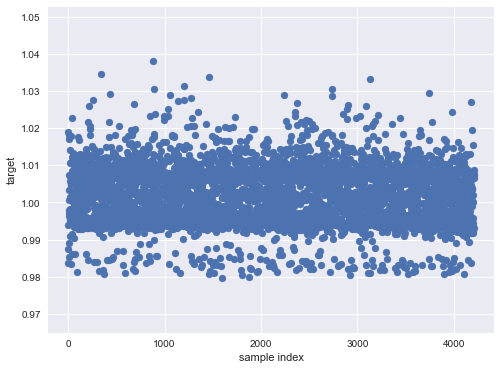

In [74]:
#analysis numerical features and target 
plt.figure(figsize = (8,6))
tar_val = np.sort(df_train[target].values)
plt.scatter(range(df_train.shape[0]),tar_val)
plt.xlabel('sample index')
plt.ylabel('target')


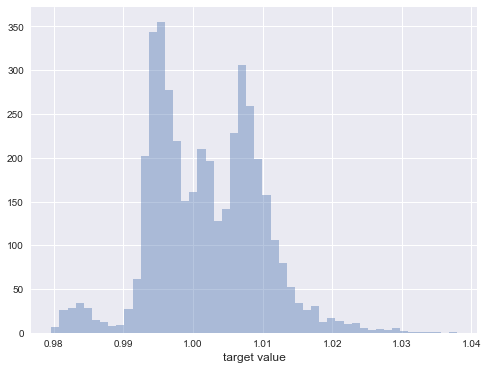

In [76]:
# histgram of target
plt.figure(figsize=(8,6))
#plt.hist(tar_val)
sns.distplot(tar_val,bins=50,kde=False)
plt.xlabel('target value',fontsize=12)


# skewed distribution, may be need to do log transformation to the target variable

In [68]:
print(target)

['y']


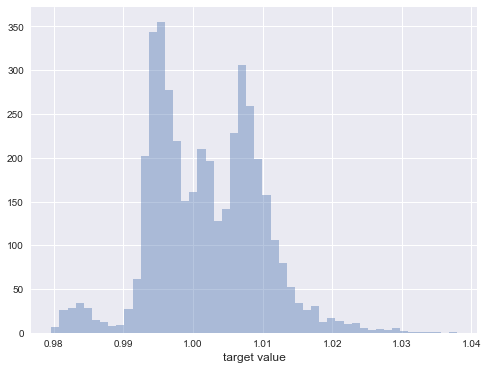

In [72]:
ulimit = 180
#df_train[target].ix[df_train[target]>ulimit] = ulimit
df_train.loc[df_train[target[0]]>ulimit,target[0]] = ulimit
#df_train[target[0]] = np.log(df_train[target[0]]+1)
# histgram of target
plt.figure(figsize=(8,6))
#plt.hist(tar_val)
sns.distplot(df_train[target[0]],bins=50,kde=False)
plt.xlabel('target value',fontsize=12)

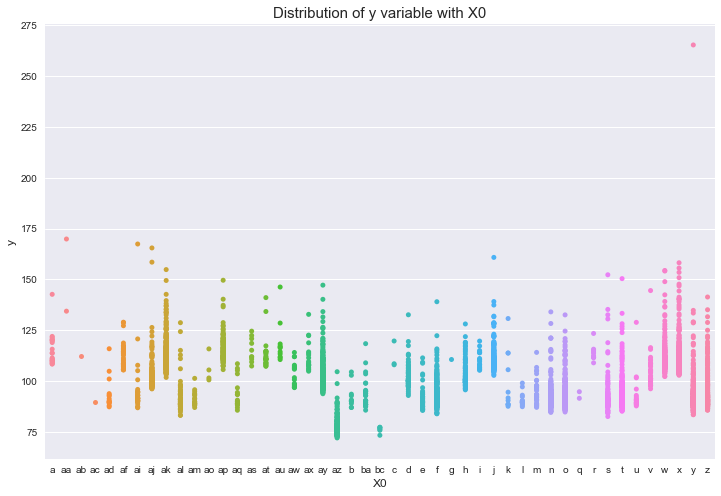

In [53]:
# explore the categorical features w.r.t target variables
var_name = "X0"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,8))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

# we need to handle the outliers

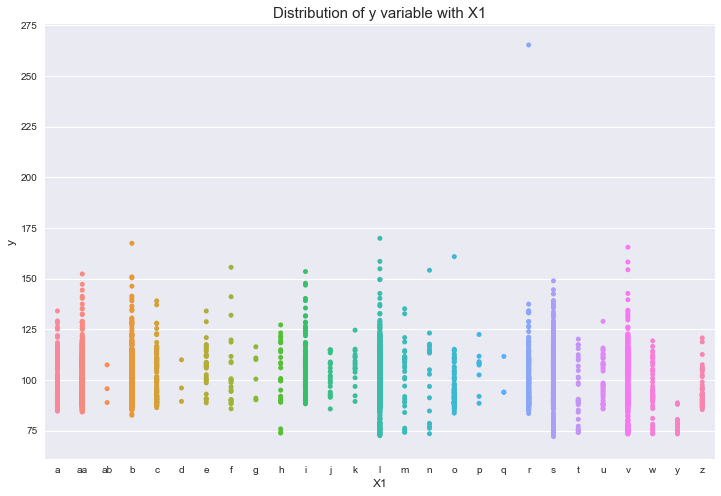

In [54]:
# explore the categorical features w.r.t target variables
var_name = "X1"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,8))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

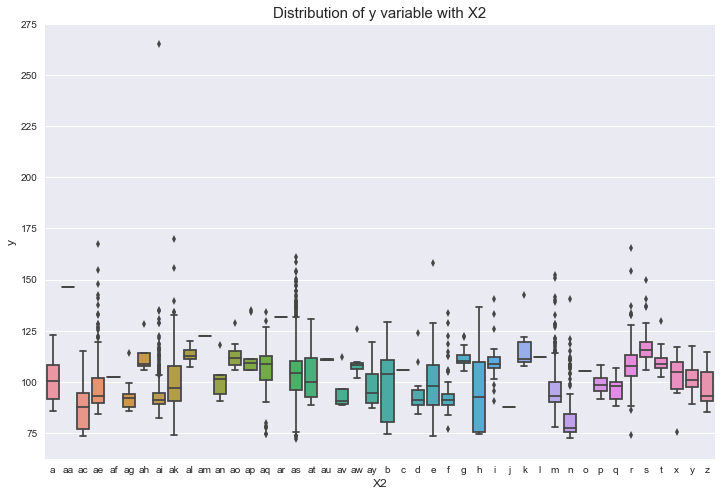

In [55]:
var_name = "X2"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,8))
sns.boxplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

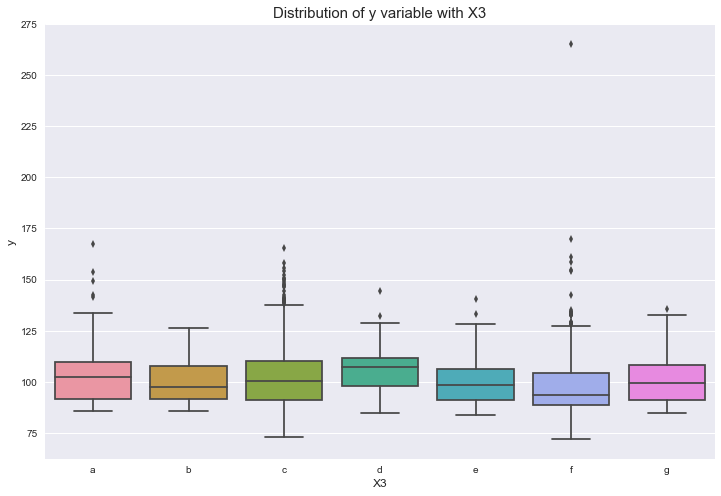

In [56]:
var_name = "X3"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,8))
sns.boxplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

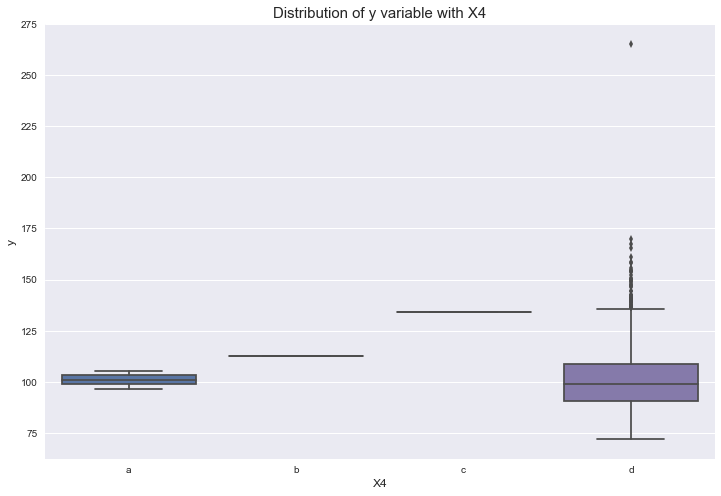

In [57]:
var_name = "X4"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,8))
sns.boxplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

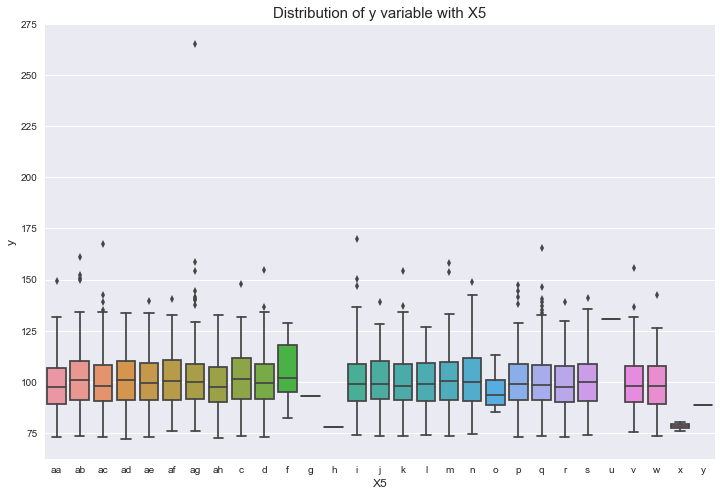

In [58]:
var_name = "X5"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,8))
sns.boxplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

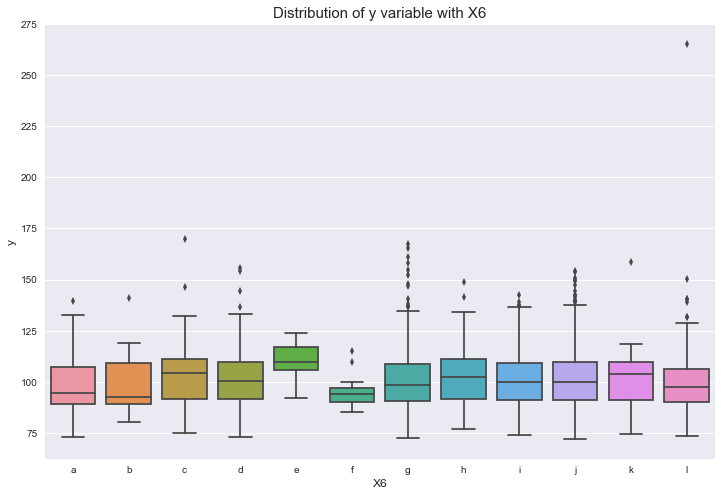

In [59]:
var_name = "X6"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,8))
sns.boxplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

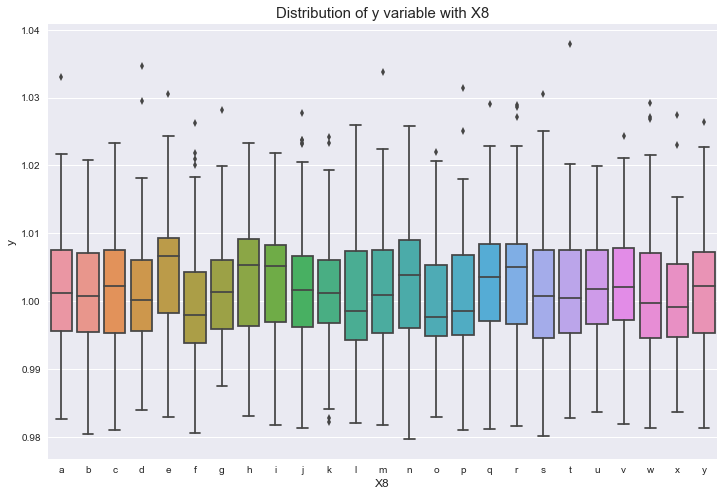

In [75]:
var_name = "X8"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,8))
sns.boxplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

# explore the numerical features
nearly all binary vairables, so can also use the box plots


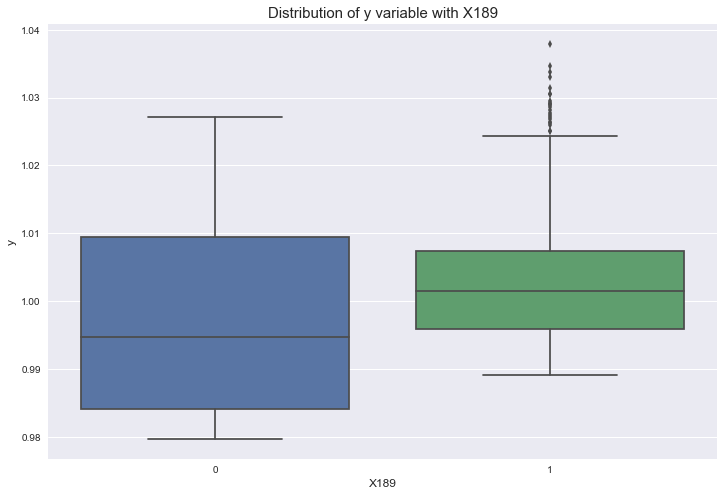

In [77]:
var_name = "X189"
#col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,8))
sns.boxplot(x=var_name, y='y', data=df_train)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

# other features can also be analysised in this way